Setup & Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
%matplotlib inline

Load the Data/csv

In [51]:
df_raw = pd.read_csv('../data/row/solar-measurements_benin-malanville_qc.csv', encoding='ISO-8859-1', low_memory=False)
print(df_raw['Timestamp'].head(10))


0    yyyy-mm-dd hh:mm
1    2021-08-09 00:01
2    2021-08-09 00:02
3    2021-08-09 00:03
4    2021-08-09 00:04
5    2021-08-09 00:05
6    2021-08-09 00:06
7    2021-08-09 00:07
8    2021-08-09 00:08
9    2021-08-09 00:09
Name: Timestamp, dtype: object


In [52]:
df = pd.read_csv("../data/row/solar-measurements_benin-malanville_qc.csv", encoding='ISO-8859-1')

# Drop the first row (units) and reset index
df = df.drop(index=0).copy()
df.reset_index(drop=True, inplace=True)

# Convert to appropriate data types
numeric_columns = [
    "GHI", "DNI", "DHI", "ModA", "ModB", "Tamb", "RH", "WS", "WSgust",
    "WSstdev", "WD", "WDstdev", "BP", "Precipitation", "TModA", "TModB"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df["Cleaning"] = pd.to_numeric(df["Cleaning"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')

# Drop empty column
df.drop(columns=["Comments"], inplace=True)

df.head()


C:\Users\Tinsae D.D\AppData\Local\Temp\ipykernel_7384\3501726694.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/row/solar-measurements_benin-malanville_qc.csv", encoding='ISO-8859-1')


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


Summary Statistics & Missing Values

In [53]:
print("Summary Statistics:")
display(df[numeric_columns].describe())

print("\nMissing Values:")
missing = df.isna().sum()
display(missing[missing > 0])

print("\nColumns with >5% Missing:")
threshold = 0.05 * len(df)
display(missing[missing > threshold])


Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,2.500000,81.000000,72.500000



Missing Values:


Series([], dtype: int64)


Columns with >5% Missing:


Series([], dtype: int64)

Outlier Detection & Basic Cleaning
Z-scores & Flag Outliers computing

In [54]:
z_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = df[z_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3)
print("Outliers detected per column (|Z| > 3):")
display(outliers.sum())

Outliers detected per column (|Z| > 3):


GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64

Data Cleaning - Impute or DropHandle Missing Values (Median Impute)


In [55]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df.dropna(subset=["Timestamp", "Cleaning"], inplace=True)

Export Cleaned Data

In [56]:
os.makedirs("data", exist_ok=True)
df.to_csv("data/benin_clean.csv", index=False)
print("Cleaned CSV saved to data/benin_clean.csv")

Cleaned CSV saved to data/benin_clean.csv


Time Series Analysis

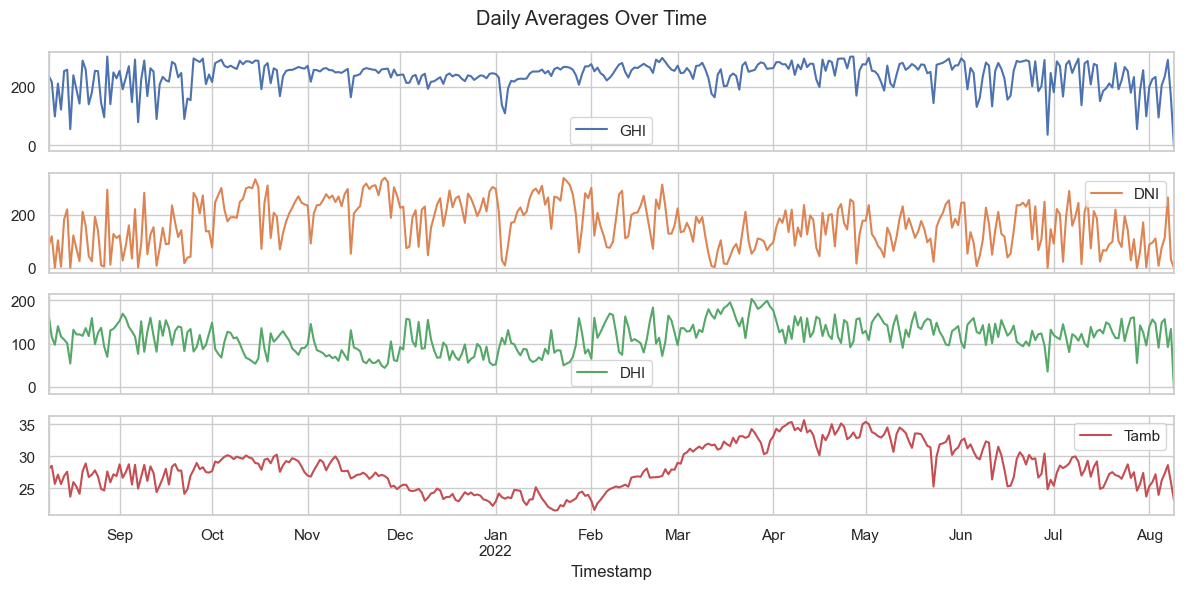

In [57]:
# Cell 7: Time Series Plots
df.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].resample("D").mean().plot(subplots=True, title="Daily Averages Over Time")
plt.tight_layout()
plt.show()

 Cleaning Impact on ModA & ModB

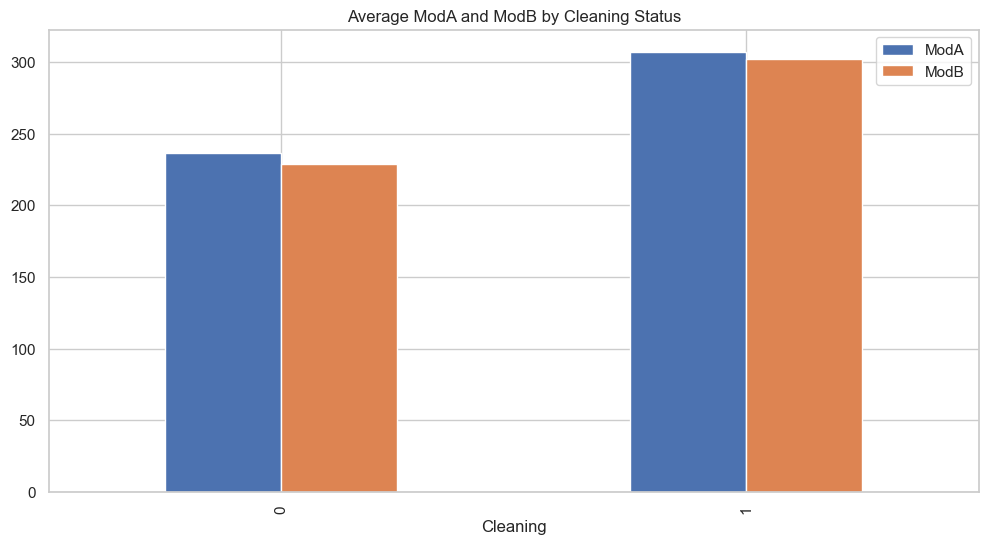

In [58]:
df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind='bar', title="Average ModA and ModB by Cleaning Status")
plt.show()

Correlation & Relationships

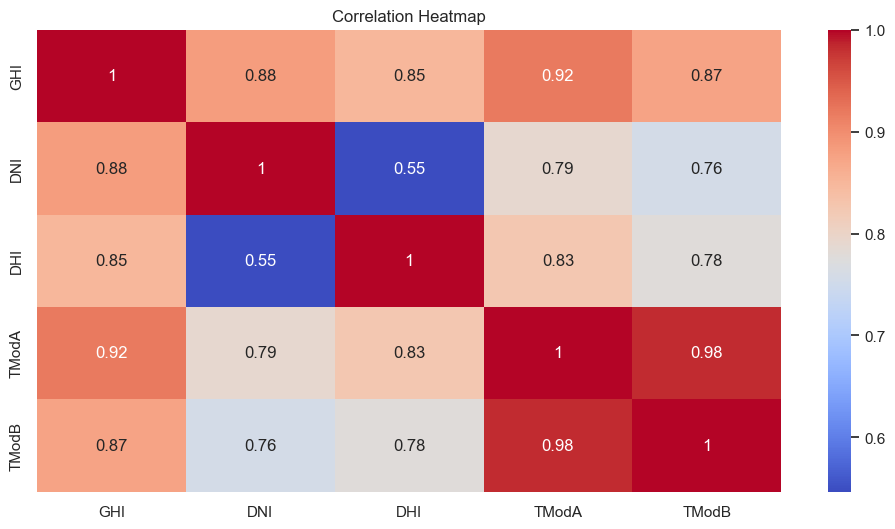

In [59]:
# Cell 9: Correlation Heatmap
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

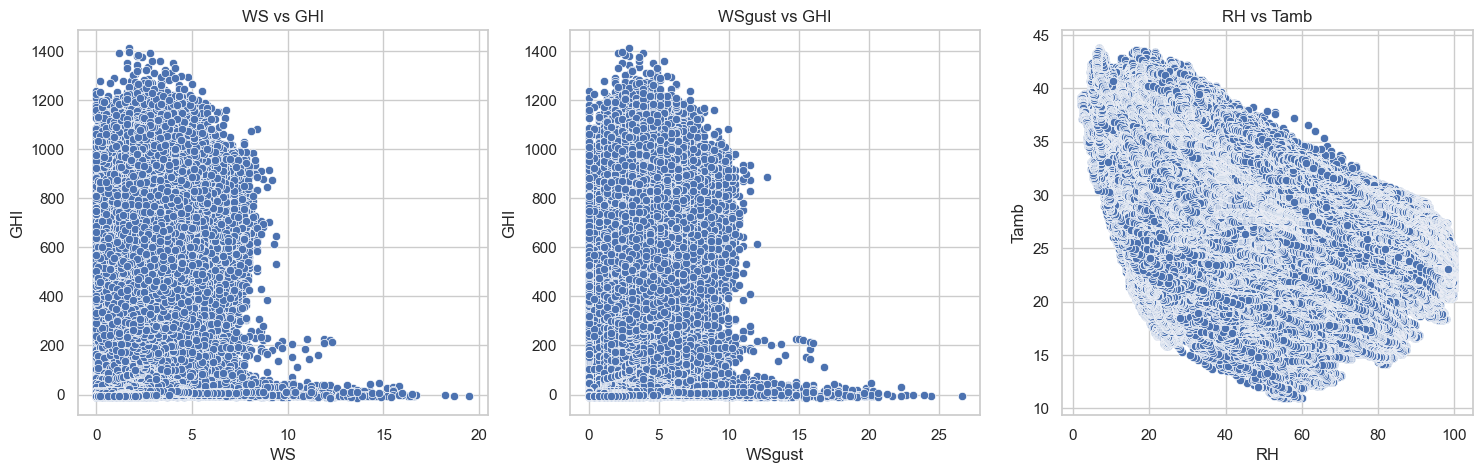

In [60]:
# Cell 10: Scatter Plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x="WS", y="GHI", ax=axs[0])
sns.scatterplot(data=df, x="WSgust", y="GHI", ax=axs[1])
sns.scatterplot(data=df, x="RH", y="Tamb", ax=axs[2])
axs[0].set_title("WS vs GHI")
axs[1].set_title("WSgust vs GHI")
axs[2].set_title("RH vs Tamb")
plt.show()

Wind & Distribution Analysis

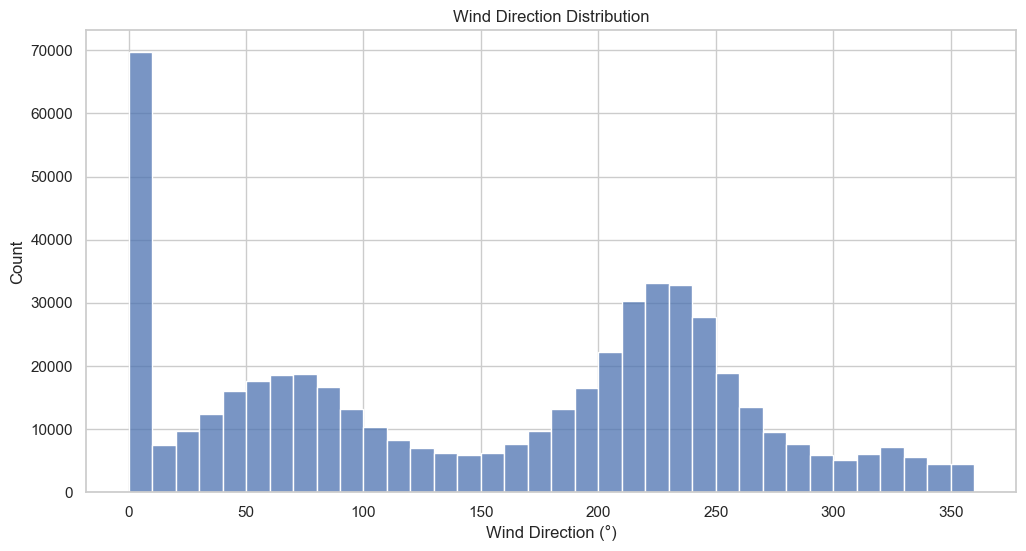

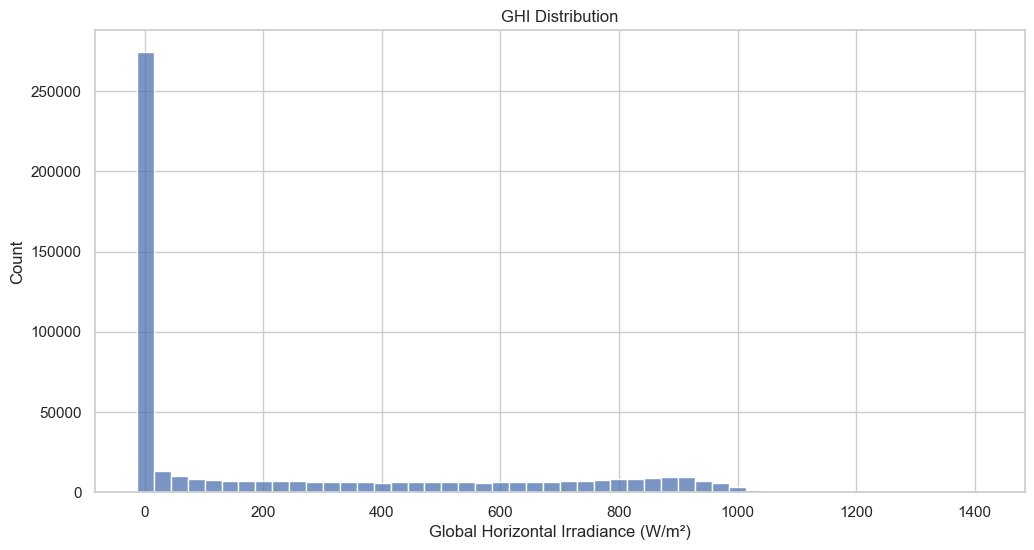

In [61]:
# Cell 11: Wind Distribution & Histogram
sns.histplot(df["WD"], bins=36, kde=False)
plt.title("Wind Direction Distribution")
plt.xlabel("Wind Direction (°)")
plt.show()

sns.histplot(df["GHI"], bins=50)
plt.title("GHI Distribution")
plt.xlabel("Global Horizontal Irradiance (W/m²)")
plt.show()

Temperature Analysis (RH Influence)

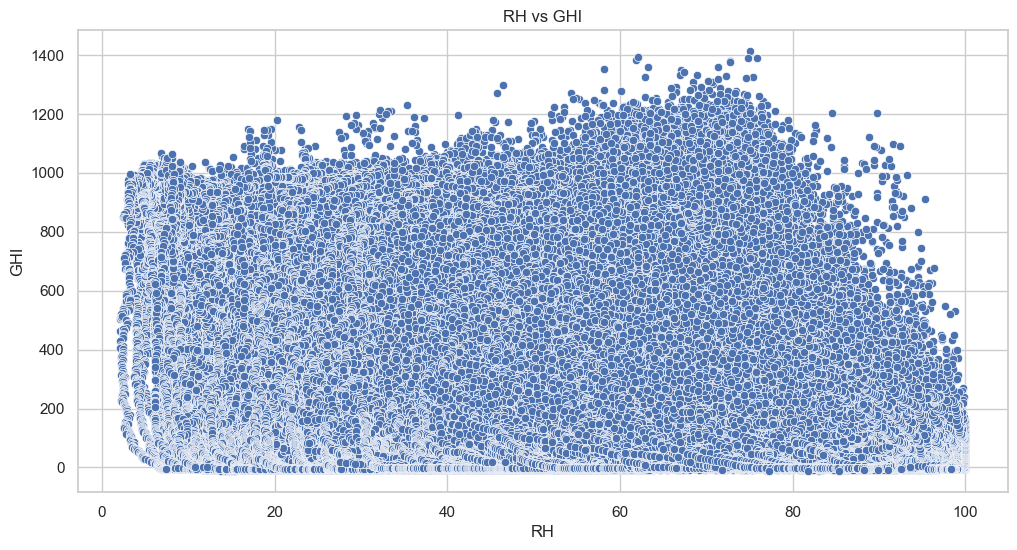

In [62]:
sns.scatterplot(data=df, x='RH', y='GHI')
plt.title("RH vs GHI")
plt.show()

Bubble Chart (Multi-variable Viz)

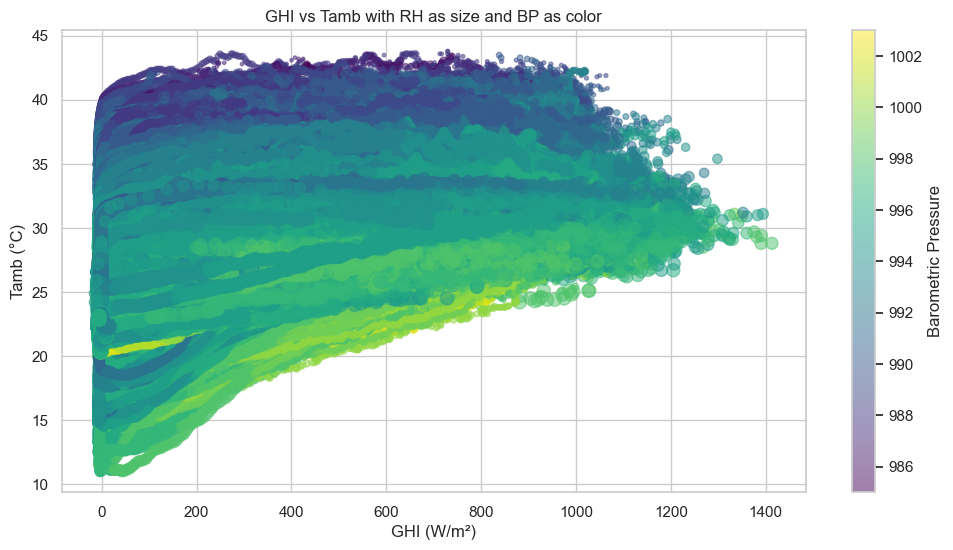

In [63]:
# Cell 12: Bubble Chart
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"], alpha=0.5, c=df["BP"], cmap="viridis")
plt.colorbar(label="Barometric Pressure")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Tamb (°C)")
plt.title("GHI vs Tamb with RH as size and BP as color")
plt.show()